In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import statistics
import matplotlib.pyplot as plt
#loading the data
val = pd.read_excel(r'/content/THYROID.xlsx')
val

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [ ]:
#printing the data types
import pandas as pd
data_types = val.dtypes

# Print the data types
print(data_types)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [ ]:
#finding all ? values and replacing with NAN
val['TSH'] = val['TSH'].replace('?', float('nan'))
val['T3'] = val['T3'].replace('?', float('nan'))
val['FTI'] = val['FTI'].replace('?', float('nan'))
val['TT4'] = val['TT4'].replace('?', float('nan'))
val['T4U'] = val['T4U'].replace('?', float('nan'))

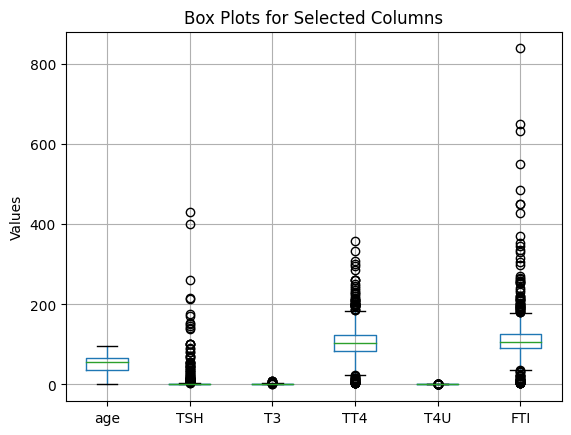

In [ ]:
#box plotting the data to find outliers
import pandas as pd
import matplotlib.pyplot as plt



# List of columns you want to create box plots for
selected_columns = ['age','TSH','T3','TT4','T4U','FTI','TBG']

# Create box plots for the selected columns
val[selected_columns].boxplot()

# Customize the plot (optional)
plt.title("Box Plots for Selected Columns")
plt.ylabel("Values")

# Show the plot
plt.show()

In [ ]:
#filling missing values
mode_gender = val['sex'].mode()[0]
val['sex'].fillna(mode_gender, inplace=True)




In [ ]:
#normalizing numerical values
import pandas as pd

numerical_columns = ['TSH','T3','TT4','T4U','FTI','TBG']  # Add all numerical columns you want to normalize

# Min-Max scaling for all selected numerical columns
for column in numerical_columns:
    val[column] = (val[column] - val[column].min()) / (val[column].max() - val[column].min())

# Now, all selected numerical columns are normalized to the range [0, 1]

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' with multiple numerical columns
# Example DataFrame:
# df = pd.DataFrame({'Age': [25, 30, 35, 40, 45, 50],
#                    'TSH': [2.5, 3.2, 1.8, 8.5, 2.0, 2.1],
#                    'T3': [2.0, 2.5, 2.3, 2.8, 2.2, 2.1],
#                    'TT4': [100, 120, 90, 200, 105, 110],
#                    'T4U': [0.95, 0.92, 0.96, 0.88, 0.94, 0.93],
#                    'FTI': [105, 130, 95, 230, 110, 118],
#                    'TBG': [15, 18, 12, 35, 16, 17]})

# Define a threshold for the Z-score (e.g., 2.5 or 3 for extreme outliers)
z_score_threshold = 2.5

# Create a new DataFrame to store the cleaned data
df_cleaned = val.copy()

# Iterate through selected numerical columns and remove outliers
for column in ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']:
    # Calculate the Z-score for the current column
    z_scores = np.abs((df_cleaned[column] - df_cleaned[column].mean()) / df_cleaned[column].std())

    # Identify and remove rows with outliers based on the Z-score
    outlier_rows = z_scores > z_score_threshold
    df_cleaned = df_cleaned[~outlier_rows]

TypeError: ignored

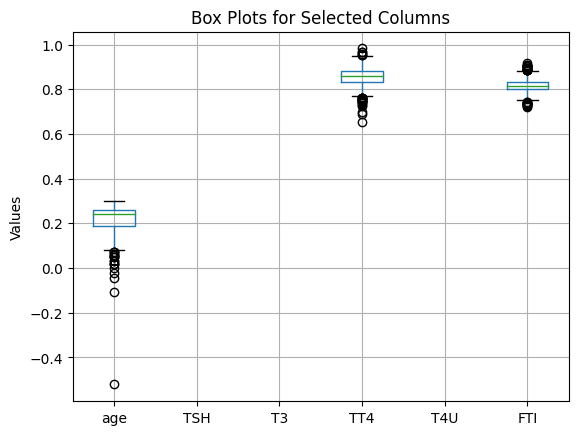

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns you want to create box plots for
selected_columns = ['age','TSH','T3','TT4','T4U','FTI','TBG']

# Create box plots for the selected columns
df_cleaned[selected_columns].boxplot()

# Customize the plot (optional)
plt.title("Box Plots for Selected Columns")
plt.ylabel("Values")

# Show the plot
plt.show()

In [ ]:
#FINDING THE RANGE OF THE NUMERICAL DATA
import pandas as pd
range = val.describe()
min_values = range.loc['min']
max_values = range.loc['max']

# Print the data range for numerical attributes
print("Minimum Values:")
print(min_values)

print("\nMaximum Values:")
print(max_values)






Minimum Values:
Record ID    840801013.0
age                  1.0
Name: min, dtype: float64

Maximum Values:
Record ID    841031032.0
age                 97.0
Name: max, dtype: float64


In [ ]:
#Study the presence of missing values in each attributes
missing_values = val.isnull()


missing_counts = missing_values.sum()


print("Missing Value Counts by Attribute:")
print(missing_counts)

Missing Value Counts by Attribute:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtyp

In [ ]:
#printing mean of data
means = val.mean()
print("Mean of Numeric Data:")
print(means)

Mean of Numeric Data:
Record ID    8.409340e+08
age          5.150900e+01
dtype: float64


<ipython-input-11-c71e7aa6810c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = val.mean()


In [ ]:
#printing variance of data
variances = val.var()

# Print the variances
print("Variance of Numeric Data:")
print(variances)

Variance of Numeric Data:
Record ID    5.819759e+09
age          3.525585e+02
dtype: float64


<ipython-input-12-789bbce4fb16>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = val.var()


In [ ]:
#standard deviation
std_devs = val.std()

# Print the standard deviations
print("Standard Deviation of Numeric Data:")
print(std_devs)

Standard Deviation of Numeric Data:
Record ID    76287.343316
age             18.776541
dtype: float64


<ipython-input-13-25b509182378>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_devs = val.std()


In [ ]:
missing_values = val.isnull()

# Summarize missing values by column
missing_counts = missing_values.sum()

# Print the result
print("Missing Value Counts by Attribute:")
print(missing_counts)

Missing Value Counts by Attribute:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtyp

In [ ]:
#LABEL ENCODING
val = pd.DataFrame(val)
categorical_columns = val.select_dtypes(include=['object']).columns

for col in categorical_columns:
    val[col + '_encoded'] = pd.factorize(val[col])[0]
print(val)

     Record ID  age sex on thyroxine query on thyroxine  \
0    840801013   29   F            f                  f   
1    840801014   29   F            f                  f   
2    840801042   41   F            f                  f   
3    840803046   36   F            f                  f   
4    840803047   32   F            f                  f   
..         ...  ...  ..          ...                ...   
995  841031002   41   F            f                  f   
996  841031010   41   F            f                  f   
997  841031030   20   F            f                  f   
998  841031031   20   F            f                  f   
999  841031032   73   F            f                  f   

    on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                           f    f        f               f              f   
1                           f    f        f               f              f   
2                           f    f        f              

In [ ]:
#ONE HOT ENCODING
val = pd.DataFrame(val)

val_encoded = pd.get_dummies(val)

print(val_encoded)

     Record ID  age  Category_encoded  sex_encoded  on thyroxine_encoded  \
0    840801013   29                 0            0                     0   
1    840801014   29                 0            0                     0   
2    840801042   41                 0            0                     0   
3    840803046   36                 0            0                     0   
4    840803047   32                 0            0                     0   
..         ...  ...               ...          ...                   ...   
995  841031002   41                 0            0                     0   
996  841031010   41                 0            0                     0   
997  841031030   20                 0            0                     0   
998  841031031   20                 0            0                     0   
999  841031032   73                 0            0                     0   

     query on thyroxine_encoded  on antithyroid medication_encoded  \
0                

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(val.select_dtypes(include='number')))
outliers = (z_scores > 3).all(axis=1)
outlier_rows = val[outliers]
outlier_rows

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured_encoded,TT4_encoded,T4U measured_encoded,T4U_encoded,FTI measured_encoded,FTI_encoded,TBG measured_encoded,TBG_encoded,referral source_encoded,Condition_encoded


In [ ]:
#finding jaquard coefficient


min_max_scaler = lambda x: (x - x.min()) / (x.max() - x.min())
df_normalized = val.copy()
df_normalized[df_normalized.columns] = df_normalized[df_normalized.columns].apply(min_max_scaler)

# A4: Similarity Measures - Jaccard Coefficient and Simple Matching Coefficient
# Assuming you want to calculate these measures for the first two rows of the DataFrame

# Select the first two rows (or any rows you want to compare)
row1 = df_normalized.iloc[0, :]
row2 = df_normalized.iloc[1, :]

# Jaccard Coefficient
jaccard_coefficient = np.sum(np.minimum(row1, row2)) / np.sum(np.maximum(row1, row2))

# Simple Matching Coefficient
smc = np.sum(np.equal(row1, row2)) / len(row1)

print("Jaccard Coefficient:", jaccard_coefficient)
print("Simple Matching Coefficient:", smc)

TypeError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations



# Select the first 20 observation vectors
first_20 = val.iloc[:20, :]

# A6: Calculate JC, SMC, and COS between pairs of vectors and create a heatmap
pairwise_jc = []
pairwise_smc = []
pairwise_cosine = []

for pair in combinations(first_20.index, 2):
    vector1 = first_20.loc[pair[0], :]
    vector2 = first_20.loc[pair[1], :]

    # Jaccard Coefficient
    intersection = sum((vector1 == 1) & (vector2 == 1))
    union = sum((vector1 == 1) | (vector2 == 1))

    # Avoid division by zero
    if union == 0:
        jc = 0.0
    else:
        jc = intersection / union

    pairwise_jc.append(jc)

    # Simple Matching Coefficient
    smc = sum(vector1 == vector2) / len(vector1)
    pairwise_smc.append(smc)

    # Cosine Similarity
    cosine_sim = 1 - cosine(vector1, vector2)
    pairwise_cosine.append(cosine_sim)

# Create a DataFrame for the pairwise similarity measures
pairwise_similarity_df = pd.DataFrame({
    'JC': pairwise_jc,
    'SMC': pairwise_smc,
    'COS': pairwise_cosine
})

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_similarity_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Similarity Heatmap")
plt.show()


NameError: ignored